# **Assignment: ANN**

63130500102 วงศกร แสงสุรศักดิ์

Link 2D Dataset: https://drive.google.com/file/d/1uvxB8O3hXM5Qqr29zAVwtgY0kZU6QyW9/view?usp=sharing

Link Image Dataset: https://drive.google.com/drive/folders/17SWbfn0Egf4NQ6uccWcp6uretlYbY0SU?usp=sharing

## 2D Data

### Generate 2D Data

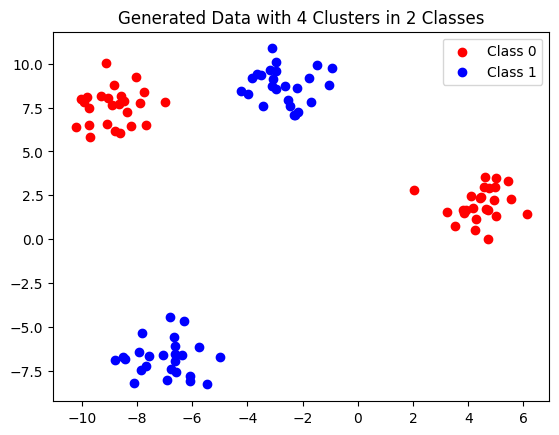

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Generate 2D data with 4 clusters
data ,labels = make_blobs(n_samples = 100, n_features = 2, centers = 4, cluster_std = 1.0, random_state = 42)

labels = (labels % 2 == 0).astype(int) # Convert labels to 2 classes

plt.scatter(data[labels == 0 , 0], data[labels == 0 , 1], c = 'red', label = 'Class 0')
plt.scatter( data [ labels == 1 , 0], data[ labels == 1 , 1], c='blue', label = 'Class 1')
plt.title("Generated Data with 4 Clusters in 2 Classes")
plt.legend()
plt.show()

### Create Model

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build a simple model using Keras
model = keras.Sequential ([
    layers.Dense(3, activation ='relu', input_shape =(2 ,)),
    layers.Dense(2, activation ='softmax') # = จำนวนคลาส
])

# Compile the model
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics =['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=2000, validation_split=0.2 ,verbose=0)

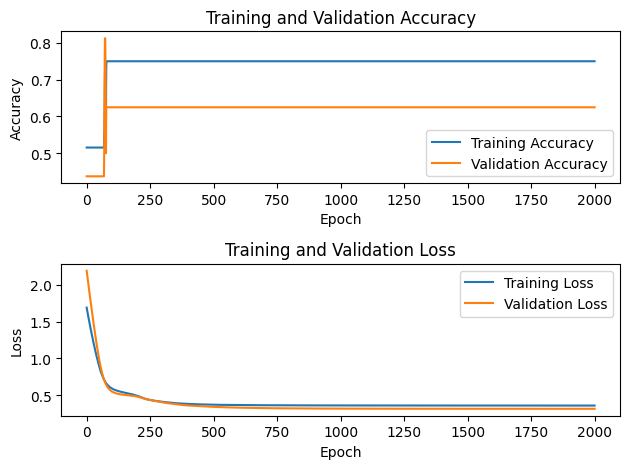

In [ ]:
# Plot training history for accuracy
plt.subplot(2 , 1 , 1)
plt.plot(history.history['accuracy'], label ='Training Accuracy')
plt.plot(history.history['val_accuracy'], label ='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training history for loss
plt.subplot(2 , 1 , 2 )
plt.plot(history.history['loss'], label ='Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

### Testing

In [ ]:
X_test.shape

(20, 2)

In [ ]:
prob_pred = model.predict(X_test)
prob_pred

1/1 [==============================] - 0s 80ms/step


array([[5.1566845e-01, 4.8433149e-01],
       [5.5388646e-04, 9.9944603e-01],
       [9.9973822e-01, 2.6184111e-04],
       [2.5438407e-04, 9.9974573e-01],
       [5.1566845e-01, 4.8433149e-01],
       [9.9986243e-01, 1.3754587e-04],
       [5.1566845e-01, 4.8433149e-01],
       [9.9992245e-01, 7.7519850e-05],
       [5.1566845e-01, 4.8433149e-01],
       [4.6054476e-01, 5.3945518e-01],
       [5.1566845e-01, 4.8433149e-01],
       [2.5751907e-04, 9.9974251e-01],
       [5.1566845e-01, 4.8433149e-01],
       [5.1566845e-01, 4.8433149e-01],
       [9.9987954e-01, 1.2043148e-04],
       [5.1566845e-01, 4.8433149e-01],
       [2.3536349e-04, 9.9976462e-01],
       [5.1566845e-01, 4.8433149e-01],
       [4.5476068e-04, 9.9954516e-01],
       [9.9991965e-01, 8.0391241e-05]], dtype=float32)

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred

1/1 [==============================] - 0s 20ms/step


array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

### Plotting Result

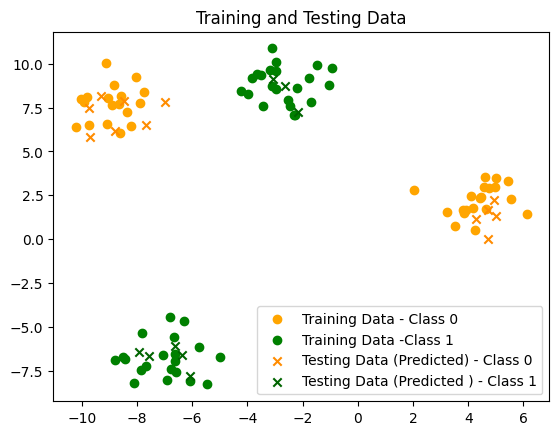

In [ ]:
# Plot the training data
plt.scatter(X_train[y_train ==0 , 0], X_train [ y_train ==0 , 1], c='orange', marker ='o', label ='Training Data - Class 0')
plt.scatter(X_train[y_train ==1 , 0], X_train [ y_train ==1 , 1], c='green', marker ='o', label ='Training Data -Class 1')

# Plot the testing data with predicted labels
plt.scatter(X_test[y_test ==0 , 0], X_test [ y_test ==0 , 1], c='darkorange', marker ='x', label ='Testing Data (Predicted) - Class 0')
plt.scatter(X_test[y_test ==1 , 0], X_test [ y_test ==1 , 1], c='darkgreen', marker ='x', label ='Testing Data (Predicted ) - Class 1')
plt.title("Training and Testing Data")
plt.legend()
plt.show()

### Model Exploration

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 9         
                                                                 
 dense_3 (Dense)             (None, 2)                 8         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[-0.23996465,  1.654307  , -0.01125003],
        [-0.43923938,  0.08076783, -0.40816075]], dtype=float32),
 array([ 0.3468808 ,  0.7159669 , -0.21797493], dtype=float32),
 array([[-1.4071357 ,  0.43987364],
        [ 0.97931343, -0.05420568],
        [-0.3781685 , -0.78804487]], dtype=float32),
 array([ 0.03134724, -0.03134722], dtype=float32)]

In [ ]:
model.layers[0].get_config()['activation']

'relu'

In [ ]:
model.layers[1].get_config()['activation']

'softmax'

In [ ]:
x_new = np.array([[0 , 0]])
model.predict(x_new)

1/1 [==============================] - 0s 56ms/step


array([[0.54040366, 0.45959634]], dtype=float32)

## Tabular Table Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

### Read Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/INT421/Dataset/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

### Preprocess Data

In [ ]:
# Categorical Encoding
le_sex = LabelEncoder().fit(df['Sex'])
le_bp = LabelEncoder().fit(df['BP'])
le_chol = LabelEncoder().fit(df['Cholesterol'])
le_drug = LabelEncoder()
le_drug.classes_ = np.array(['drugA', 'drugB', 'drugC', 'drugX', 'DrugY'])
df['Sex'] = le_sex . transform( df['Sex'])
df['BP'] = le_bp . transform( df['BP'])
df['Cholesterol'] = le_chol.transform ( df['Cholesterol'])
df['Drug'] = le_drug.transform ( df['Drug'])
X = df.drop('Drug', axis =1)
y = df['Drug']

In [ ]:
# Split the data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size =0.2 , random_state =42 )

In [ ]:
# Standardize the data
scaler = StandardScaler ()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model Creation

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense (32 , input_shape =(5,) , activation ='relu') )
model.add(Dense (16 , activation ='relu') )
model.add(Dense (5 , activation ='softmax') )

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200 , batch_size=32 ,validation_data =(X_test , y_test ) ,verbose =0 )

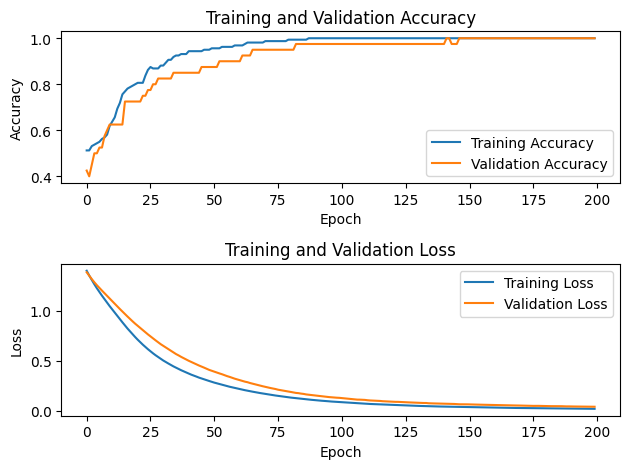

In [ ]:
# Plot training history for accuracy
plt.subplot (2 , 1 , 1 )
plt.plot (history.history ['accuracy'], label ='Training Accuracy')
plt.plot (history.history ['val_accuracy'], label ='Validation Accuracy')
plt.title ('Training and Validation Accuracy')
plt.xlabel ('Epoch')
plt.ylabel ('Accuracy')
plt.legend ()

# Plot training history for loss
plt.subplot (2 , 1 , 2 )
plt.plot (history.history ['loss'], label ='Training Loss')
plt.plot (history.history ['val_loss'], label ='Validation Loss')
plt.title ('Training and Validation Loss')
plt.xlabel ('Epoch')
plt.ylabel ('Loss')
plt.legend ()
plt.tight_layout ()
plt.show ()

###  Model Testing and Evaluation

In [ ]:
y_pred = np . argmax ( model . predict ( X_test ) , axis =1 )
y_pred

2/2 [==============================] - 0s 7ms/step


array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0])

In [ ]:
y_test.values

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0])

In [ ]:
from sklearn . metrics import confusion_matrix , classification_report
# Confusion Matrix
cm = confusion_matrix ( y_test , y_pred )
print ("Confusion Matrix :")
print ( cm )
# Classification Report
class_report = classification_report ( y_test , y_pred )
print ("Classification Report :")
print ( class_report )

Confusion Matrix :
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## Image Data

Dataset: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset

### Load Image Data

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
train_ds = keras.utils.image_dataset_from_directory (
directory = '/content/drive/MyDrive/INT421/Dataset/Covid19-dataset/train',
labels = 'inferred',
label_mode ='categorical',
batch_size = 32,
image_size = (224, 224))
test_ds = keras.utils.image_dataset_from_directory(
directory = '/content/drive/MyDrive/INT421/Dataset/Covid19-dataset/test',
labels = 'inferred',
label_mode = 'categorical',
batch_size = 32,
image_size = (224, 224))

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


### Convu2D and MaxPooling2D Concepts

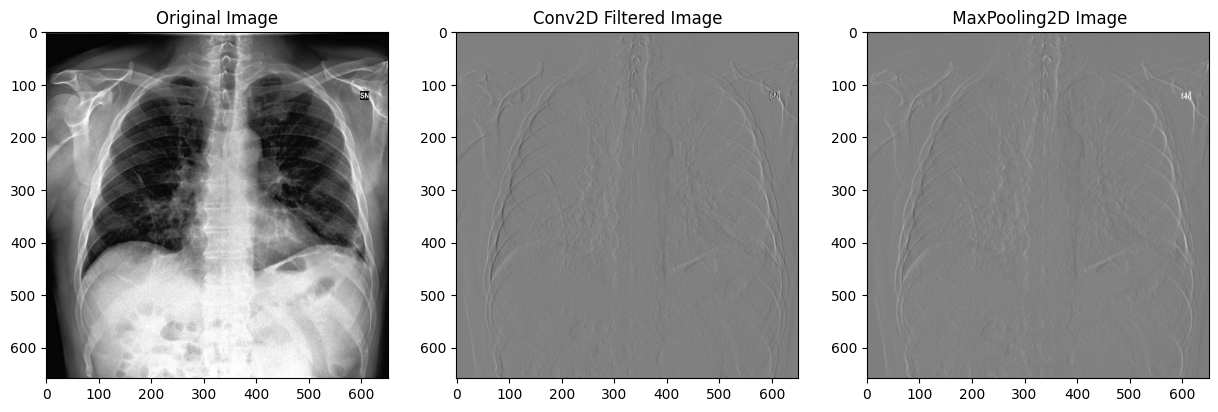

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.ndimage import maximum_filter
from scipy import misc

# Load a sample image
image_path = '/content/drive/MyDrive/INT421/Dataset/Covid19-dataset/test/Covid/0100.jpeg' # Replace with your image path
image = plt.imread(image_path)

# Define a simple Conv2D filter
filter_kernel = np.array ([[2 , 0 , -2], [2 , 0 , -2], [2 , 0 , -2]])

# Apply the Conv2D filter to the image
convolved_image = convolve2d (image [:, :, 0], filter_kernel , mode ='same',boundary ='symm')

# Apply MaxPooling2D to the convolved image
pooling_size = 2
pooled_image = maximum_filter ( convolved_image , size = ( pooling_size , pooling_size) )

# Visualize the original , convolved , and pooled images
plt.figure(figsize=( 15 , 5 ))
plt.subplot(1 , 3 , 1 )
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1 , 3 , 2 )
plt.imshow(convolved_image , cmap ='gray')
plt.title('Conv2D Filtered Image')
plt.subplot(1 , 3 , 3 )
plt.imshow(pooled_image , cmap ='gray')
plt.title(' MaxPooling2D Image')
plt.show()

### Model Creation

In [4]:
model = keras.Sequential([
layers.Conv2D(32,(3, 3 ), activation ='relu', input_shape=(224, 224, 3 )),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(128,(3,3),activation ='relu') ,
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(128, activation='relu') ,
layers.Dense(3, activation='softmax') # have 3 classes
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [10]:
model.compile(optimizer ='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_ds, epochs =50, validation_data = test_ds)

Epoch 1/50
8/8 [==============================] - 50s 4s/step - loss: 0.0432 - accuracy: 0.9960 - val_loss: 3.2238 - val_accuracy: 0.8636
Epoch 2/50
8/8 [==============================] - 36s 4s/step - loss: 0.1027 - accuracy: 0.9801 - val_loss: 10.1922 - val_accuracy: 0.7879
Epoch 3/50
8/8 [==============================] - 36s 4s/step - loss: 0.7377 - accuracy: 0.9602 - val_loss: 2.6341 - val_accuracy: 0.8788
Epoch 4/50
8/8 [==============================] - 35s 4s/step - loss: 0.0906 - accuracy: 0.9801 - val_loss: 2.8157 - val_accuracy: 0.9091
Epoch 5/50
8/8 [==============================] - 42s 5s/step - loss: 0.5827 - accuracy: 0.9681 - val_loss: 2.5061 - val_accuracy: 0.8788
Epoch 6/50
8/8 [==============================] - 36s 4s/step - loss: 0.1283 - accuracy: 0.9841 - val_loss: 4.7798 - val_accuracy: 0.8788
Epoch 7/50
8/8 [==============================] - 36s 4s/step - loss: 7.5655e-07 - accuracy: 1.0000 - val_loss: 5.5296 - val_accuracy: 0.8636
Epoch 8/50
8/8 [=============

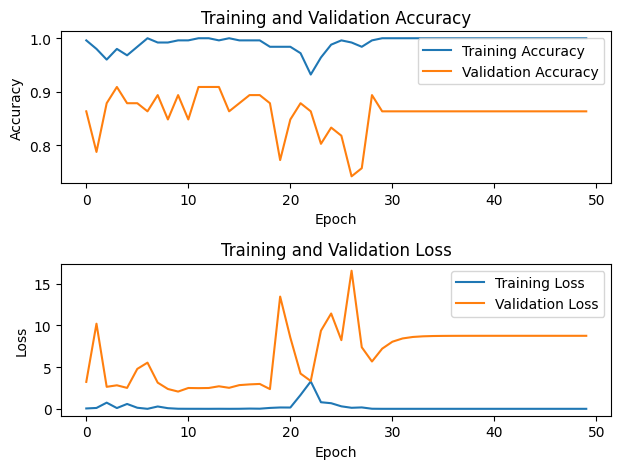

In [11]:
import matplotlib.pyplot as plt

# Plot training history for accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training history for loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

### Prediction

3/3 [==============================] - 2s 649ms/step
Confusion Matrix:
[[26  0  0]
 [ 0 20  0]
 [ 1  8 11]]


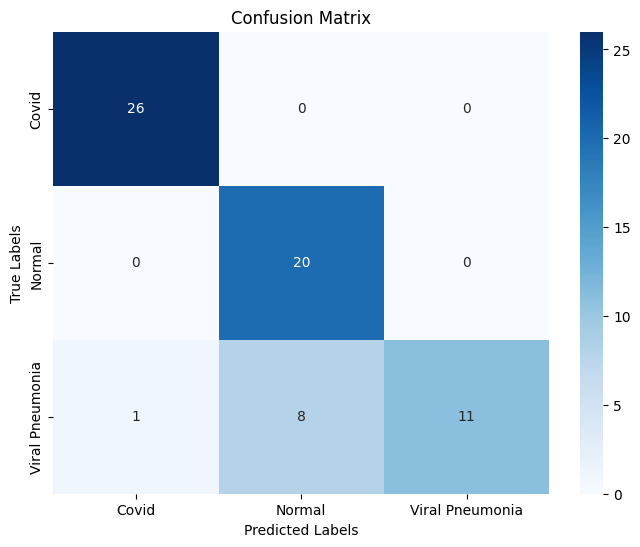

Accuracy: 0.8636363636363636
Classification Report:
                 precision    recall  f1-score   support

          Covid       0.96      1.00      0.98        26
         Normal       0.71      1.00      0.83        20
Viral Pneumonia       1.00      0.55      0.71        20

       accuracy                           0.86        66
      macro avg       0.89      0.85      0.84        66
   weighted avg       0.90      0.86      0.85        66



In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert the test dataset to numpy arrays
X_test = []
y_true = []
for images, labels in test_ds:
    X_test.append(images.numpy())
    y_true.append(np.argmax(labels.numpy(), axis=1))

X_test = np.vstack(X_test)
y_true = np.concatenate(y_true)

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Covid', 'Normal', 'Viral Pneumonia'],
            yticklabels=['Covid', 'Normal', 'Viral Pneumonia'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Classification Report (Precision, Recall, F1 Score)
class_report = classification_report(y_true, y_pred, target_names=['Covid', 'Normal', 'Viral Pneumonia'])
print("Classification Report:")
print(class_report)
